## Загрузка данных ступино

In [60]:
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

# Specify the name that is used to seach for the data
place_name = "Ступино"

# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)

/home/zomb-clyo-gpu1/.local/lib/python3.6/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/home/zomb-clyo-gpu1/.local/lib/python3.6/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/home/zomb-clyo-gpu1/.local/lib/python3.6/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


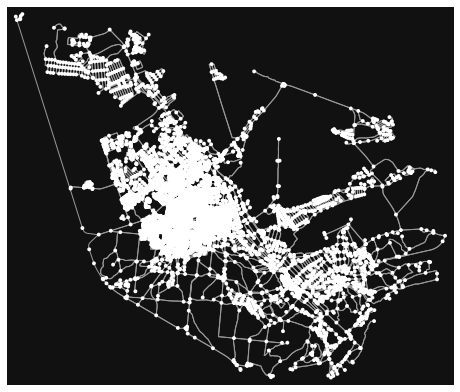

In [61]:
fig, ax = ox.plot_graph(graph)

In [62]:
area = ox.geocode_to_gdf(place_name) 

In [63]:
area.shape

(1, 14)

In [74]:
buildings = ox.geometries_from_place(place_name, tags={'building':True})

/home/zomb-clyo-gpu1/.local/lib/python3.6/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/home/zomb-clyo-gpu1/.local/lib/python3.6/site-packages/osmnx/geometries.py:816: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_inner_linestring in list(merged_inner_linestrings):
/home/zomb-clyo-gpu1/.local/lib/python3.6/site-packages/osmnx/geometries.py:816: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_inner_linestring in list(merged_inner_linestr

In [76]:
buildings.head()

geometry  ref  \
element_type osmid                                                              
way          38149921  POLYGON ((38.08843 54.89178, 38.08841 54.89168...  NaN   
             38150506  POLYGON ((38.08792 54.88927, 38.08812 54.88926...  NaN   
             96695125  POLYGON ((38.08118 54.89339, 38.08129 54.89400...  NaN   
             96695127  POLYGON ((38.08185 54.89397, 38.08205 54.89396...  NaN   
             96695129  POLYGON ((38.08257 54.89392, 38.08277 54.89391...  NaN   

                      name office name:ru shop access amenity opening_hours  \
element_type osmid                                                            
way          38149921  NaN    NaN     NaN  NaN    NaN     NaN           NaN   
             38150506  NaN    NaN     NaN  NaN    NaN     NaN           NaN   
             96695125  NaN    NaN     NaN  NaN    NaN     NaN           NaN   
             96695127  NaN    NaN     NaN  NaN    NaN     NaN           NaN   
             96695129  NaN    NaN     NaN  NaN    NaN     NaN           NaN   

                      man_made  ... toilets:access toilets:fee building:parts  \
element_type osmid              ...                                             
way          38149921      NaN  ...            NaN         NaN            NaN   
             38150506      NaN  ...            NaN         NaN            NaN   
             96695125      NaN  ...            NaN         NaN            NaN   
             96695127      NaN  ...            NaN         NaN            NaN   
             96695129      NaN  ...            NaN         NaN            NaN   

                      level disused construction ways type building:flats  \
element_type osmid                                                          
way          38149921   NaN     NaN          NaN  NaN  NaN            NaN   
             38150506   NaN     NaN          NaN  NaN  NaN            NaN   
             96695125   NaN     NaN          NaN  NaN  NaN            NaN   
             96695127   NaN     NaN          NaN  NaN  NaN            NaN   
             96695129   NaN     NaN          NaN  NaN  NaN            NaN   

                      energy_class  
element_type osmid                  
way          38149921          NaN  
             38150506          NaN  
             96695125          NaN  
             96695127          NaN  
             96695129          NaN  

[5 rows x 103 columns]

In [102]:
buildings.shape

(6121, 103)

In [113]:
buildings.isna().sum().to_frame().sort_values(by=0).head(30)
# здесь кажется хватит первых 20-30 колонок, потому что в остальных непустых значений <5

,0
geometry,0
building,0
nodes,0
building:levels,4422
addr:housenumber,4832
addr:street,5000
addr:city,5192
name,6002
power,6002
substation,6004


In [114]:
filtered_build = buildings[list(buildings.isna().sum().to_frame().sort_values(by=0).head(20).index)]

In [115]:
filtered_build.building.unique()

array(['apartments', 'church', 'train_station', 'yes', 'service',
       'school', 'residential', 'retail', 'kindergarten', 'hospital',
       'industrial', 'commercial', 'public', 'shed', 'roof', 'cathedral',
       'civic', 'ground_station', 'house', 'construction', 'garages',
       'college', 'office', 'garage', 'warehouse', 'chapel', 'kiosk',
       'detached', 'university', 'ruins', 'manufacture', 'hangar'],
      dtype=object)

In [116]:
filtered_build.building.value_counts()

yes               2933
house              647
shed               468
detached           437
apartments         384
garages            292
industrial         188
garage             169
roof               141
service            139
retail             109
residential         37
commercial          36
construction        25
kindergarten        24
school              17
hospital            15
civic               12
warehouse           12
church               7
public               6
college              4
kiosk                3
university           3
hangar               3
office               3
train_station        2
ruins                1
chapel               1
manufacture          1
ground_station       1
cathedral            1
Name: building, dtype: int64

## Смотрю на разные типы зданий
Смотрю с помощью https://www.openstreetmap.org/{way/relation}/{osmid}

In [117]:
filtered_build[filtered_build.building=="yes"]
#здесь просто здания практически без инфы

geometry  \
element_type osmid                                                           
way          109731077   POLYGON ((38.02137 54.89772, 38.02144 54.89772...   
             114515876   POLYGON ((38.14291 54.87224, 38.14284 54.87219...   
             123304001   POLYGON ((38.15765 54.87776, 38.15758 54.87785...   
             123304002   POLYGON ((38.15535 54.87720, 38.15522 54.87716...   
             123304003   POLYGON ((38.15846 54.87680, 38.15837 54.87690...   
...                                                                    ...   
             1120051309  POLYGON ((38.07516 54.91245, 38.07526 54.91233...   
             1120051338  POLYGON ((38.07405 54.89687, 38.07414 54.89687...   
             1157582277  POLYGON ((38.13209 54.87187, 38.13222 54.87192...   
relation     6113497     POLYGON ((38.06185 54.89471, 38.06195 54.89477...   
             6240410     POLYGON ((38.07124 54.88916, 38.07144 54.88915...   

                        building  \
element_type osmid                 
way          109731077       yes   
             114515876       yes   
             123304001       yes   
             123304002       yes   
             123304003       yes   
...                          ...   
             1120051309      yes   
             1120051338      yes   
             1157582277      yes   
relation     6113497         yes   
             6240410         yes   

                                                                     nodes  \
element_type osmid                                                           
way          109731077   [1255369821, 1255369816, 1255369844, 408340881...   
             114515876   [1297071431, 1297071509, 1297071376, 129707142...   
             123304001   [1375526148, 1375526149, 1375526153, 137552615...   
             123304002   [1375526141, 1375526139, 1375526150, 137552615...   
             123304003   [1375526133, 1375526134, 1375526138, 137552613...   
...                                                                    ...   
             1120051309  [10244112739, 10244112738, 10244112737, 102441...   
             1120051338  [10244112842, 10244112839, 10244112840, 102441...   
             1157582277  [10765262977, 10765262978, 10765262979, 107652...   
relation     6113497     [[[4687661696, 4687661697, 4687661698], [46876...   
             6240410     [[[3105784479, 3105784476, 4189450693, 3105784...   

                        building:levels addr:housenumber      addr:street  \
element_type osmid                                                          
way          109731077                1              NaN              NaN   
             114515876              NaN              NaN              NaN   
             123304001              NaN              NaN              NaN   
             123304002              NaN              NaN              NaN   
             123304003              NaN              NaN              NaN   
...                                 ...              ...              ...   
             1120051309             NaN              NaN              NaN   
             1120051338             NaN              NaN              NaN   
             1157582277             NaN              NaN              NaN   
relation     6113497                  1              NaN              NaN   
             6240410                  4              57А  улица Куйбышева   

                        addr:city           name power substation shop  ref  \
element_type osmid                                                            
way          109731077        NaN  Проходная КПП   NaN        NaN  NaN  NaN   
             114515876        NaN            NaN   NaN        NaN  NaN  NaN   
             123304001        NaN            NaN   NaN        NaN  NaN  NaN   
             123304002        NaN            NaN   NaN        NaN  NaN  NaN   
             123304003        NaN            NaN   NaN        NaN  NaN  NaN   
...         

In [119]:
filtered_build[filtered_build.building=="shed"]
#shed - сарай - реально разные пристройки рядом с жилыми домами/рынками

geometry  \
element_type osmid                                                          
way          165873341  POLYGON ((38.08231 54.88535, 38.08250 54.88534...   
             306375564  POLYGON ((38.06983 54.88811, 38.06982 54.88803...   
             401926405  POLYGON ((38.05555 54.88646, 38.05553 54.88634...   
             401926411  POLYGON ((38.05728 54.88658, 38.05728 54.88654...   
             402264225  POLYGON ((38.05313 54.88728, 38.05312 54.88721...   
...                                                                   ...   
             504020469  POLYGON ((38.08775 54.89407, 38.08775 54.89404...   
             504020470  POLYGON ((38.08775 54.89407, 38.08767 54.89408...   
             504020473  POLYGON ((38.08823 54.89403, 38.08802 54.89404...   
             504020474  POLYGON ((38.08801 54.89401, 38.08801 54.89398...   
             504020475  POLYGON ((38.08788 54.89405, 38.08788 54.89403...   

                       building  \
element_type osmid                
way          165873341     shed   
             306375564     shed   
             401926405     shed   
             401926411     shed   
             402264225     shed   
...                         ...   
             504020469     shed   
             504020470     shed   
             504020473     shed   
             504020474     shed   
             504020475     shed   

                                                                    nodes  \
element_type osmid                                                          
way          165873341  [1773884326, 1773884325, 1773884323, 177388432...   
             306375564  [3112635567, 3112635565, 3112635564, 311263556...   
             401926405  [4043332138, 4043332139, 4043332140, 404333214...   
             401926411  [4043332168, 4043332169, 4043332170, 411638783...   
             402264225  [4046772764, 4046772765, 4046772766, 404677276...   
...                                                                   ...   
             504020469  [4942374873, 4942374874, 4942374875, 494237487...   
             504020470  [4942374873, 4942374877, 4942374878, 494237487...   
             504020473  [4942374887, 4942374888, 4942374889, 494237489...   
             504020474  [4942374889, 4942374891, 4942374892, 494237489...   
             504020475  [4942374898, 4942374899, 4942374900, 494237490...   

                       building:levels addr:housenumber addr:street addr:city  \
element_type osmid                                                              
way          165873341               1              NaN         NaN       NaN   
             306375564               1              NaN         NaN       NaN   
             401926405               1              NaN         NaN       NaN   
             401926411               1              NaN         NaN       NaN   
             402264225               1              NaN         NaN       NaN   
...                                ...              ...         ...       ...   
             504020469             NaN              NaN         NaN       NaN   
             504020470             NaN              NaN         NaN       NaN   
             504020473             NaN              NaN         NaN       NaN   
             504020474             NaN              NaN         NaN       NaN   
             504020475             NaN              NaN         NaN       NaN   

                       name power substation shop  ref amenity covered  \
element_type osmid                                                       
way          165873341  NaN   NaN        NaN  NaN  NaN     NaN     NaN   
             306375564  NaN   NaN        NaN  NaN  NaN     NaN     NaN   
             401926405  NaN   NaN        NaN  NaN  NaN     NaN     NaN   
             401926411  NaN   NaN        NaN  NaN  NaN     NaN     NaN   
             402264225  NaN   NaN        NaN  NaN  NaN     NaN     NaN   
...                     ...   ...

In [120]:
filtered_build[filtered_build["building"] =="church"]
#здесь видно, что чсть объектов являются отношением, часть линией и они не пересекаются

geometry  \
element_type osmid                                                          
way          102163388  POLYGON ((38.19589 54.88448, 38.19582 54.88462...   
             172675316  POLYGON ((38.14285 54.87094, 38.14308 54.87082...   
             190486423  POLYGON ((38.08146 54.90120, 38.08145 54.90109...   
             402538970  POLYGON ((38.05693 54.88475, 38.05693 54.88470...   
relation     10294944   POLYGON ((38.15092 54.85451, 38.15096 54.85453...   
             10294945   POLYGON ((38.15079 54.85423, 38.15076 54.85425...   
             10294946   POLYGON ((38.15054 54.85404, 38.15051 54.85405...   

                       building  \
element_type osmid                
way          102163388   church   
             172675316   church   
             190486423   church   
             402538970   church   
relation     10294944    church   
             10294945    church   
             10294946    church   

                                                                    nodes  \
element_type osmid                                                          
way          102163388  [1179122783, 1179122573, 1179122350, 117912227...   
             172675316  [1835568594, 1835568588, 1835568593, 183556859...   
             190486423  [2011267072, 2011267070, 2011267069, 201126707...   
             402538970  [4049335796, 4049335797, 4049335803, 404933581...   
relation     10294944   [[[6974964322, 6974964321], [6974964320, 69749...   
             10294945   [[[6974964333, 6974964332, 6974964324, 6974964...   
             10294946   [[[1399057832, 6974964328], [6974964327, 69749...   

                       building:levels addr:housenumber        addr:street  \
element_type osmid                                                           
way          102163388             NaN              NaN                NaN   
             172675316             NaN              NaN                NaN   
             190486423             NaN              NaN                NaN   
             402538970             NaN              59А  улица Чайковского   
relation     10294944              NaN              NaN                NaN   
             10294945              NaN              NaN                NaN   
             10294946              NaN              NaN                NaN   

                       addr:city                                        name  \
element_type osmid                                                             
way          102163388       NaN        Церковь Иконы Божией Матери Знамение   
             172675316       NaN      Церковь Иконы Божией Матери Тихвинская   
             190486423       NaN                                         NaN   
             402538970   Ступино       Церковь Державной иконы Божией Матери   
relation     10294944        NaN                  Церковь Николая Чудотворца   
             10294945        NaN  Церковь Усекновения Головы Иоанна Предтечи   
             10294946        NaN                 Церковь Сергия Радонежского   

                       power substation shop  ref           amenity covered  \
element_type osmid                                                            
way          102163388   NaN        NaN  NaN  NaN  place_of_worship     NaN   
             172675316   NaN        NaN  NaN  NaN  place_of_worship     NaN   
             190486423   NaN        NaN  NaN  NaN  place_of_worship     NaN   
             402538970   NaN        NaN  NaN  NaN  place_of_worship     NaN   
relation     10294944    NaN        NaN  NaN  NaN  place_of_worship     NaN   
             10294945    NaN        NaN  NaN  NaN  place_of_worship     NaN   
             10294946    NaN        NaN  NaN  NaN  place_of_worship     NaN   

                       man_made addr:postcode min_height height opening_hours  \
element_type osmid                                                              
way          102163388      NaN           NaN        NaN    NaN

## Финальные данные

In [95]:
filtered_build

geometry  \
element_type osmid                                                         
way          38149921  POLYGON ((38.08843 54.89178, 38.08841 54.89168...   
             38150506  POLYGON ((38.08792 54.88927, 38.08812 54.88926...   
             96695125  POLYGON ((38.08118 54.89339, 38.08129 54.89400...   
             96695127  POLYGON ((38.08185 54.89397, 38.08205 54.89396...   
             96695129  POLYGON ((38.08257 54.89392, 38.08277 54.89391...   
...                                                                  ...   
relation     10294944  POLYGON ((38.15092 54.85451, 38.15096 54.85453...   
             10294945  POLYGON ((38.15079 54.85423, 38.15076 54.85425...   
             10294946  POLYGON ((38.15054 54.85404, 38.15051 54.85405...   
             14184727  POLYGON ((38.05542 54.88067, 38.05545 54.88086...   
             14184732  POLYGON ((38.05538 54.88040, 38.05540 54.88053...   

                         building  \
element_type osmid                  
way          38149921  apartments   
             38150506  apartments   
             96695125  apartments   
             96695127  apartments   
             96695129  apartments   
...                           ...   
relation     10294944      church   
             10294945      church   
             10294946      church   
             14184727  apartments   
             14184732  apartments   

                                                                   nodes  \
element_type osmid                                                         
way          38149921  [449063448, 449063449, 449063450, 449063451, 4...   
             38150506  [449069926, 449069927, 4294693489, 4294693488,...   
             96695125  [1119809344, 1119809343, 1119809359, 433084688...   
             96695127  [1119809355, 1119809351, 4330846905, 433084690...   
             96695129  [1119809358, 1119809348, 1119809349, 111980935...   
...                                                                  ...   
relation     10294944  [[[6974964322, 6974964321], [6974964320, 69749...   
             10294945  [[[6974964333, 6974964332, 6974964324, 6974964...   
             10294946  [[[1399057832, 6974964328], [6974964327, 69749...   
             14184727  [[[9772014258, 9772014259], [9772014258, 97720...   
             14184732  [[[9771944898, 4315851787, 4315851786, 4315851...   

                      building:levels addr:housenumber         addr:street  \
element_type osmid                                                           
way          38149921               5                5    улица Тимирязева   
             38150506               5            18/19     улица Тургенева   
             96695125               5               43   Октябрьская улица   
             96695127               5               41   Октябрьская улица   
             96695129               5               39   Октябрьская улица   
...                               ...              ...                 ...   
relation     10294944             NaN              NaN                 NaN   
             10294945             NaN              NaN                 NaN   
             10294946             NaN              NaN                 NaN   
             14184727              17                9  Приокский переулок   
             14184732              15             9 к1  Приокский переулок   

                      addr:city                                        name  \
element_type osmid                                                            
way          38149921   Ступино                                         NaN   
             38150506   Ступино                                         NaN   
             96695125   Ступино                                         NaN   
             96695127   Ступино                                         NaN   
             96695129   Ступино                                         NaN   
...                         ...     

In [122]:
filtered_build.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 6121 entries, ('way', 38149921) to ('relation', 14184732)
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geometry          6121 non-null   geometry
 1   building          6121 non-null   object  
 2   nodes             6121 non-null   object  
 3   building:levels   1699 non-null   object  
 4   addr:housenumber  1289 non-null   object  
 5   addr:street       1121 non-null   object  
 6   addr:city         929 non-null    object  
 7   name              119 non-null    object  
 8   power             119 non-null    object  
 9   substation        117 non-null    object  
 10  shop              53 non-null     object  
 11  ref               49 non-null     object  
 12  amenity           34 non-null     object  
 13  covered           29 non-null     object  
 14  man_made          26 non-null     object  
 15  addr:postcode     20 non-null 

In [ ]:
filtered_build.to_csv("Stupino_OSM.csv")